# **Preparation**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import string
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB

# Set pandas to display all columns of a DataFrame when it is printed or shown in the console
pd.set_option('display.max_columns', None)

In [2]:
# Read Data from CSV
df = pd.read_csv("/content/FullReview.csv",sep=',',encoding='utf-8')
df.drop(['Sentiment'], axis=1)
df.head()

,Place_ID,Place_Name,User,Review,Star,Sentiment
0,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Barep Pratama,Akhirnyaaaa bisa nulis review yang memuaskannn...,5,NaN
1,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Luqman Heryana,Cafe de paris\nTerletak di timur pantai parang...,5,NaN
2,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Catharine Winata,"masakannya enak tp kecil2 sesuai dg harganya😊,...",4,NaN
3,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Dewi Pustaka,"Ownernya baik banget, nginep disini pas Ramadh...",5,NaN
4,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Kiki Melaendo,"Tempatnya bagus bgt, makanan enak dan cocok bu...",5,NaN


# **Data Pre-Processing**

In [3]:
# Lower the alphabets
def lower_text(text):
    # Replaces all non-alphabetic characters in the text string with a space, and then converts the resulting string to lowercase.
    return re.sub('[^a-zA-Z]', ' ', text).lower()

df['Label'] = df['Star'].map({1:0, 2:0, 3:0, 4:1, 5:1})
df['LowerReview'] = df['Review'].apply(lambda x: lower_text(x))

# See the result
df.head(10)

,Place_ID,Place_Name,User,Review,Star,Sentiment,Label,LowerReview
0,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Barep Pratama,Akhirnyaaaa bisa nulis review yang memuaskannn...,5,NaN,1,akhirnyaaaa bisa nulis review yang memuaskannn...
1,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Luqman Heryana,Cafe de paris\nTerletak di timur pantai parang...,5,NaN,1,cafe de paris terletak di timur pantai parangt...
2,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Catharine Winata,"masakannya enak tp kecil2 sesuai dg harganya😊,...",4,NaN,1,masakannya enak tp kecil sesuai dg harganya ...
3,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Dewi Pustaka,"Ownernya baik banget, nginep disini pas Ramadh...",5,NaN,1,ownernya baik banget nginep disini pas ramadh...
4,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Kiki Melaendo,"Tempatnya bagus bgt, makanan enak dan cocok bu...",5,NaN,1,tempatnya bagus bgt makanan enak dan cocok bu...
5,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Ibrohim Hanafi,Makananan seafoodnya enak banget.\nSangat reko...,5,NaN,1,makananan seafoodnya enak banget sangat rekom...
6,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Siska Mirawati,Pinggir pantai murah meriah.. Enak.. Ada homes...,5,NaN,1,pinggir pantai murah meriah enak ada homes...
7,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Erlina Wahyuni,Melukiskan suasana hati yang sulit dijelaskan,5,NaN,1,melukiskan suasana hati yang sulit dijelaskan
8,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",rofiq r,"ini tempat langganan paling de best, tempatnya...",5,NaN,1,ini tempat langganan paling de best tempatnya...
9,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Mugiyanto Alexsandi,"Kakapnya beda,,bawalnya beda,,dan,,recomendt b...",5,NaN,1,kakapnya beda bawalnya beda dan recomendt b...


In [4]:
# Function to count the percentage of punctuation marks in a text
def count_punct(text):
    # Count the number of punctuation marks in the text
    count = sum([1 for char in text if char in string.punctuation])
    
    # Calculate the percentage of punctuation marks (excluding spaces) in the text
    percentage = round(count / (len(text) - text.count(" ")), 3) * 100
    
    return percentage

# Compute the length of each review (excluding spaces)
df['ReviewLength'] = df['Review'].apply(lambda x: len(x) - x.count(" "))

# Compute the percentage of punctuation marks in each review 
df['Punctuation'] = df['Review'].apply(lambda x: count_punct(x))
df.head()

,Place_ID,Place_Name,User,Review,Star,Sentiment,Label,LowerReview,ReviewLength,Punctuation
0,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Barep Pratama,Akhirnyaaaa bisa nulis review yang memuaskannn...,5,NaN,1,akhirnyaaaa bisa nulis review yang memuaskannn...,482,4.6
1,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Luqman Heryana,Cafe de paris\nTerletak di timur pantai parang...,5,NaN,1,cafe de paris terletak di timur pantai parangt...,304,2.3
2,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Catharine Winata,"masakannya enak tp kecil2 sesuai dg harganya😊,...",4,NaN,1,masakannya enak tp kecil sesuai dg harganya ...,77,2.6
3,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Dewi Pustaka,"Ownernya baik banget, nginep disini pas Ramadh...",5,NaN,1,ownernya baik banget nginep disini pas ramadh...,269,4.1
4,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Kiki Melaendo,"Tempatnya bagus bgt, makanan enak dan cocok bu...",5,NaN,1,tempatnya bagus bgt makanan enak dan cocok bu...,50,2.0


In [5]:
# Tokenization
def tokenize_text(text):
    # Split the text into tokens based on whitespace
    tokenized_text = text.split()
    
    # Return the list of tokens
    return tokenized_text

# Apply the tokenize_text() function
df['tokens'] = df['LowerReview'].apply(lambda x: tokenize_text(x))
df.head()

,Place_ID,Place_Name,User,Review,Star,Sentiment,Label,LowerReview,ReviewLength,Punctuation,tokens
0,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Barep Pratama,Akhirnyaaaa bisa nulis review yang memuaskannn...,5,NaN,1,akhirnyaaaa bisa nulis review yang memuaskannn...,482,4.6,"[akhirnyaaaa, bisa, nulis, review, yang, memua..."
1,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Luqman Heryana,Cafe de paris\nTerletak di timur pantai parang...,5,NaN,1,cafe de paris terletak di timur pantai parangt...,304,2.3,"[cafe, de, paris, terletak, di, timur, pantai,..."
2,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Catharine Winata,"masakannya enak tp kecil2 sesuai dg harganya😊,...",4,NaN,1,masakannya enak tp kecil sesuai dg harganya ...,77,2.6,"[masakannya, enak, tp, kecil, sesuai, dg, harg..."
3,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Dewi Pustaka,"Ownernya baik banget, nginep disini pas Ramadh...",5,NaN,1,ownernya baik banget nginep disini pas ramadh...,269,4.1,"[ownernya, baik, banget, nginep, disini, pas, ..."
4,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Kiki Melaendo,"Tempatnya bagus bgt, makanan enak dan cocok bu...",5,NaN,1,tempatnya bagus bgt makanan enak dan cocok bu...,50,2.0,"[tempatnya, bagus, bgt, makanan, enak, dan, co..."


In [6]:
# Removing Stopwords
nltk.download('stopwords')

def stopword_removal(review):
    # Combine stopwords for Indonesian and English
    stopwords_list = stopwords.words('indonesian') + stopwords.words('english')

    # Filter out stopwords from the input review tokens
    filtered_tokens = [token for token in review if token not in stopwords_list]

    # Return the filtered tokens
    return filtered_tokens

# Apply the stopword_removal() function to the 'tokens' column
df["Review_Without_Stopwords"] = df["tokens"].apply(stopword_removal)

df.head(10)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Place_ID,Place_Name,User,Review,Star,Sentiment,Label,LowerReview,ReviewLength,Punctuation,tokens,Review_Without_Stopwords
0,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Barep Pratama,Akhirnyaaaa bisa nulis review yang memuaskannn...,5,NaN,1,akhirnyaaaa bisa nulis review yang memuaskannn...,482,4.6,"[akhirnyaaaa, bisa, nulis, review, yang, memua...","[akhirnyaaaa, nulis, review, memuaskannn, enak..."
1,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Luqman Heryana,Cafe de paris\nTerletak di timur pantai parang...,5,NaN,1,cafe de paris terletak di timur pantai parangt...,304,2.3,"[cafe, de, paris, terletak, di, timur, pantai,...","[cafe, de, paris, terletak, timur, pantai, par..."
2,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Catharine Winata,"masakannya enak tp kecil2 sesuai dg harganya😊,...",4,NaN,1,masakannya enak tp kecil sesuai dg harganya ...,77,2.6,"[masakannya, enak, tp, kecil, sesuai, dg, harg...","[masakannya, enak, tp, sesuai, dg, harganya, p..."
3,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Dewi Pustaka,"Ownernya baik banget, nginep disini pas Ramadh...",5,NaN,1,ownernya baik banget nginep disini pas ramadh...,269,4.1,"[ownernya, baik, banget, nginep, disini, pas, ...","[ownernya, banget, nginep, pas, ramadhan, pesa..."
4,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Kiki Melaendo,"Tempatnya bagus bgt, makanan enak dan cocok bu...",5,NaN,1,tempatnya bagus bgt makanan enak dan cocok bu...,50,2.0,"[tempatnya, bagus, bgt, makanan, enak, dan, co...","[tempatnya, bagus, bgt, makanan, enak, cocok, ..."
5,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Ibrohim Hanafi,Makananan seafoodnya enak banget.\nSangat reko...,5,NaN,1,makananan seafoodnya enak banget sangat rekom...,342,3.2,"[makananan, seafoodnya, enak, banget, sangat, ...","[makananan, seafoodnya, enak, banget, rekomend..."
6,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Siska Mirawati,Pinggir pantai murah meriah.. Enak.. Ada homes...,5,NaN,1,pinggir pantai murah meriah enak ada homes...,125,8.0,"[pinggir, pantai, murah, meriah, enak, ada, ho...","[pinggir, pantai, murah, meriah, enak, homesta..."
7,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Erlina Wahyuni,Melukiskan suasana hati yang sulit dijelaskan,5,NaN,1,melukiskan suasana hati yang sulit dijelaskan,40,0.0,"[melukiskan, suasana, hati, yang, sulit, dijel...","[melukiskan, suasana, hati, sulit]"
8,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",rofiq r,"ini tempat langganan paling de best, tempatnya...",5,NaN,1,ini tempat langganan paling de best tempatnya...,79,3.8,"[ini, tempat, langganan, paling, de, best, tem...","[langganan, de, best, tempatnya, nyaman, makan..."
9,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Mugiyanto Alexsandi,"Kakapnya beda,,bawalnya beda,,dan,,recomendt b...",5,NaN,1,kakapnya beda bawalnya beda dan recomendt b...,74,10.8,"[kakapnya, beda, bawalnya, beda, dan, recomend...","[kakapnya, beda, bawalnya, beda, recomendt, ba..."


In [7]:
#Shape of the dataset, and breakdown of the classes
print(f"Input data has {len(df)} rows and {len(df.columns)} columns")
print(f"Star 1 = {len(df[df['Star']==1])} rows")
print(f"Star 2 = {len(df[df['Star']==2])} rows")
print(f"Star 3 = {len(df[df['Star']==3])} rows")
print(f"Star 4 = {len(df[df['Star']==4])} rows")
print(f"Star 5 = {len(df[df['Star']==5])} rows")

Input data has 5566 rows and 12 columns
Star 1 = 227 rows
Star 2 = 102 rows
Star 3 = 331 rows
Star 4 = 1170 rows
Star 5 = 3736 rows


# **Visualize**

In [8]:
# Selecting negative and positive reviews
df_negative = df[(df['Star'] == 1) | (df['Star'] == 2) | (df['Star'] == 3)]
df_positive = df[(df['Star'] == 4) | (df['Star'] == 5)]

# Get the 'Review_Without_Stopwords' column from the negative and positive reviews
negative_list = df_negative['Review_Without_Stopwords'].tolist()
positive_list = df_positive['Review_Without_Stopwords'].tolist()

# Convert the lists of negative and positive reviews into a single string
filtered_negative = "".join(str(negative_list))
filtered_positive = "".join(str(positive_list))

# Convert the strings to lowercase
filtered_negative = filtered_negative.lower()
filtered_positive = filtered_positive.lower()

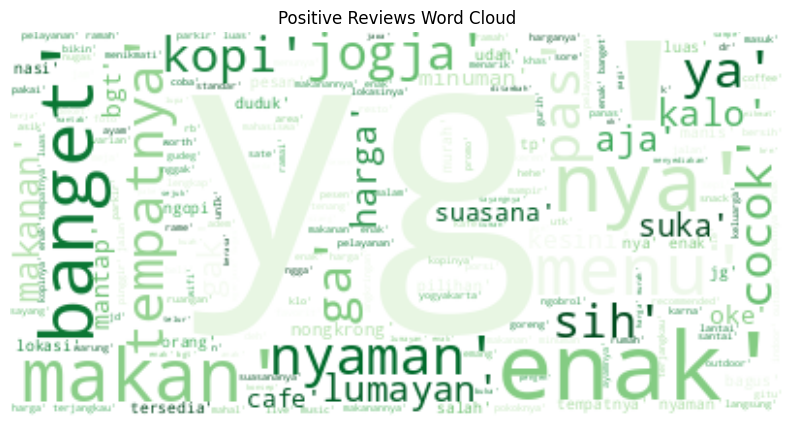

In [9]:
# Generate word cloud for positive reviews
wordcloud = WordCloud(max_font_size=160, margin=0, background_color="white", colormap="Greens").generate(filtered_positive)

# Create a figure and set its size
plt.figure(figsize=[10, 10])

# Display the word cloud image
plt.imshow(wordcloud, interpolation='bilinear')

# Turn off the axis labels and ticks
plt.axis("off")

# Remove any margins around the image
plt.margins(x=0, y=0)

# Set the title of the plot
plt.title("Positive Reviews Word Cloud")

# Show the plot
plt.show()

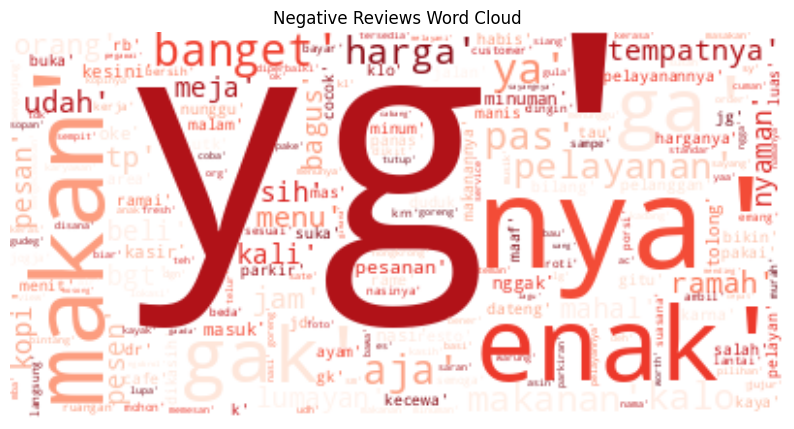

In [10]:
# Generate word cloud for negative reviews
wordcloud = WordCloud(max_font_size=160, margin=0, background_color="white", colormap="Reds").generate(filtered_negative)

# Create a figure and set its size
plt.figure(figsize=[10, 10])

# Display the word cloud image
plt.imshow(wordcloud, interpolation='bilinear')

# Turn off the axis labels and ticks
plt.axis("off")

# Remove any margins around the image
plt.margins(x=0, y=0)

# Set the title of the plot
plt.title("Negative Reviews Word Cloud")

# Show the plot
plt.show()


# **Feature Extraction**

In [11]:

# Splitting the data into training and testing sets
x = df[['Review_Without_Stopwords', 'ReviewLength', 'Punctuation']]
y = df['Label']

# Split the data using train_test_split function
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3896, 3)
(1670, 3)
(3896,)
(1670,)


In [12]:
# Convert list values to string
x_train['Review_Without_Stopwords'] = x_train['Review_Without_Stopwords'].apply(' '.join)
x_test['Review_Without_Stopwords'] = x_test['Review_Without_Stopwords'].apply(' '.join)

# TF-IDF vectorization
tfidf = TfidfVectorizer(max_df=0.5, min_df=2)
tfidf_train = tfidf.fit_transform(x_train['Review_Without_Stopwords'])
tfidf_test = tfidf.transform(x_test['Review_Without_Stopwords'])

# Concatenate the TF-IDF vectors with other features
x_train_vect = pd.concat([x_train[['ReviewLength', 'Punctuation']].reset_index(drop=True),
                          pd.DataFrame(tfidf_train.toarray())], axis=1)
x_test_vect = pd.concat([x_test[['ReviewLength', 'Punctuation']].reset_index(drop=True),
                         pd.DataFrame(tfidf_test.toarray())], axis=1)

x_train_vect.head()

ReviewLength  Punctuation    0    1    2    3    4    5    6    7    8  \
0           197          5.1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1            43          2.3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2            22          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3           198          5.1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4            35          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

     9   10   11   12   13   14   15   16   17   18   19        20   21   22  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.243137  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   

    23   24   25   26   27   28   29   30   31   32   33   34   35   36   37  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    38   39   40   41   42   43   44   45   46   47   48   49   50   51   52  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    53   54   55   56   57   58   59   60   61   62   63   64   65   66   67  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    68   69   70   71   72   73   74   75   76   77   78   79   80   81   82  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    83   84   85   86   87   88   89   90   91   92   93   94   95   96   97  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    98   99  100  101  102  103  104  105  106  107  108  109  110  111  112  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   113  114  115  116  117  118  119  120  121       122  123  124  125  126  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.338872  0.0  0.0  0.0  0.0   
1  0.0  0.0  

# **Various Algorithm to Test**

**MultiNomial Naive Bayes**

              precision    recall  f1-score   support

           0       1.00      0.02      0.04       188
           1       0.89      1.00      0.94      1482

    accuracy                           0.89      1670
   macro avg       0.94      0.51      0.49      1670
weighted avg       0.90      0.89      0.84      1670



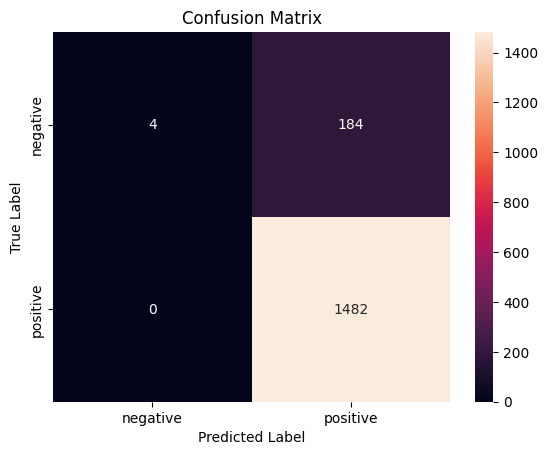

In [13]:
# Convert column names to strings
x_train_vect.columns = x_train_vect.columns.astype(str)
x_test_vect.columns = x_test_vect.columns.astype(str)

# Train the classifier
classifier = MultinomialNB()
classifier.fit(x_train_vect, y_train)
naive_bayes_pred = classifier.predict(x_test_vect)

# Classification Report
print(classification_report(y_test, naive_bayes_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, naive_bayes_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# **Predict**

In [14]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 10)

classifier.fit(tfidf_train, y_train)
classifier.score(tfidf_test, y_test)

0.9041916167664671

In [15]:
data = ["Sayurnya Basi", "Bagus", "Pelayanannya Buruk", "Menunya Enak"]
vect = tfidf.transform(data).toarray()

my_pred = classifier.predict(vect)
print(my_pred)

[0 1 0 1]


# **Export**

In [16]:
df.head(10)

,Place_ID,Place_Name,User,Review,Star,Sentiment,Label,LowerReview,ReviewLength,Punctuation,tokens,Review_Without_Stopwords
0,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Barep Pratama,Akhirnyaaaa bisa nulis review yang memuaskannn...,5,NaN,1,akhirnyaaaa bisa nulis review yang memuaskannn...,482,4.6,"[akhirnyaaaa, bisa, nulis, review, yang, memua...","[akhirnyaaaa, nulis, review, memuaskannn, enak..."
1,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Luqman Heryana,Cafe de paris\nTerletak di timur pantai parang...,5,NaN,1,cafe de paris terletak di timur pantai parangt...,304,2.3,"[cafe, de, paris, terletak, di, timur, pantai,...","[cafe, de, paris, terletak, timur, pantai, par..."
2,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Catharine Winata,"masakannya enak tp kecil2 sesuai dg harganya😊,...",4,NaN,1,masakannya enak tp kecil sesuai dg harganya ...,77,2.6,"[masakannya, enak, tp, kecil, sesuai, dg, harg...","[masakannya, enak, tp, sesuai, dg, harganya, p..."
3,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Dewi Pustaka,"Ownernya baik banget, nginep disini pas Ramadh...",5,NaN,1,ownernya baik banget nginep disini pas ramadh...,269,4.1,"[ownernya, baik, banget, nginep, disini, pas, ...","[ownernya, banget, nginep, pas, ramadhan, pesa..."
4,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Kiki Melaendo,"Tempatnya bagus bgt, makanan enak dan cocok bu...",5,NaN,1,tempatnya bagus bgt makanan enak dan cocok bu...,50,2.0,"[tempatnya, bagus, bgt, makanan, enak, dan, co...","[tempatnya, bagus, bgt, makanan, enak, cocok, ..."
5,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Ibrohim Hanafi,Makananan seafoodnya enak banget.\nSangat reko...,5,NaN,1,makananan seafoodnya enak banget sangat rekom...,342,3.2,"[makananan, seafoodnya, enak, banget, sangat, ...","[makananan, seafoodnya, enak, banget, rekomend..."
6,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Siska Mirawati,Pinggir pantai murah meriah.. Enak.. Ada homes...,5,NaN,1,pinggir pantai murah meriah enak ada homes...,125,8.0,"[pinggir, pantai, murah, meriah, enak, ada, ho...","[pinggir, pantai, murah, meriah, enak, homesta..."
7,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Erlina Wahyuni,Melukiskan suasana hati yang sulit dijelaskan,5,NaN,1,melukiskan suasana hati yang sulit dijelaskan,40,0.0,"[melukiskan, suasana, hati, yang, sulit, dijel...","[melukiskan, suasana, hati, sulit]"
8,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",rofiq r,"ini tempat langganan paling de best, tempatnya...",5,NaN,1,ini tempat langganan paling de best tempatnya...,79,3.8,"[ini, tempat, langganan, paling, de, best, tem...","[langganan, de, best, tempatnya, nyaman, makan..."
9,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Mugiyanto Alexsandi,"Kakapnya beda,,bawalnya beda,,dan,,recomendt b...",5,NaN,1,kakapnya beda bawalnya beda dan recomendt b...,74,10.8,"[kakapnya, beda, bawalnya, beda, dan, recomend...","[kakapnya, beda, bawalnya, beda, recomendt, ba..."


In [18]:
df.to_csv("Clean_FullReview.csv",index=False)